# ATL for english editorial articles

In [1]:
import sys
sys.path.append('../..')
import src.Automatic_Topic_Labeling.lable_topic as tl
import src.Automatic_Topic_Labeling.helper_functions as hp
import src.data.data_loader as dl
from src.features.vectorizer import Vectorizer
from src.models.topic_models import TopicModel
from src.visualization import label_count as lc

C:\Users\Maria\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
INFO:summarizer.preprocessing.cleaner:'pattern' package not found; tag filters are not available for English


### 1-Load tags and documents

In [2]:
data = dl.get_articles_by_type("english", "editorial",merge_tokens=False, kind='tagged')
article_texts = data["article_texts"]
article_pos = data["article_pos"]
pos=[('NN','NN'), ('JJ', 'NN')]

### 2-Load Vectorizer and Topic model

In [3]:
vec = Vectorizer.load('tagged/vectorizer/lda_english_article_texts_pos.pkl')
tm = TopicModel.load('tagged/topic_models/lda/lda_english_article_texts_tagged_130.pkl')

### 3-Generate Topic Lables with Pos-Tags

In [4]:
labels_pos = tl.get_topic_lables(article_pos,article_texts,pos,vec,tm, n_cand_lables = 100,lable_min_df = 5, n_labels = 8)

shape topic model
(130, 6365)
pmishape
(6365, 100)


### 4-Print topics and their labels

In [5]:
import pandas as pd
pd.set_option('display.max_rows', 500)

In [6]:
df_pos =hp.print_label_df(tm,labels_pos)
display(df_pos)

,0,1,2,3,4,5,6,7,8,9,label
Topic 0,say,safety,fda,recall,product,outbreak,company,people,california,illness,nausea vomiting
Topic 1,monsanto,industry,public,company,safety,call,court,group,u.s.,write,bacillus thuringiensis
Topic 2,store,say,grocery,new,will,market,customer,chain,more,year,cookie cutter
Topic 3,campaign,marketing,medium,site,this,hospital,web,video,article,â,presidential election
Topic 4,compost,waste,almond,scrap,facility,city,material,will,yard,like,vacuum cleaner
Topic 5,ddt,study,ban,allen,faculty,ph.d.,expose,studies,mouse,exposure,metabolic syndrome
Topic 6,restaurant,fast,chain,say,menu,ingredient,burger,chipotle,mcdonald,meal,music festival
Topic 7,grain,wheat,whole,flour,rice,myth,gluten,bread,white,brown,irritable bowel
Topic 8,farmer,farm,program,policy,would,government,subsidy,who,president,obama,presidential election
Topic 9,chemical,exposure,health,toxic,safe,use,cancer,can,these,about,premature aging


In [7]:
print(lc.wordcount_scor(df_pos,"label"))

Counter({'ozone layer': 15, 'cookie cutter': 12, 'bacillus thuringiensis': 11, 'avian flu': 11, 'vacuum cleaner': 10, 'irritable bowel': 9, 'thyroid gland': 9, 'premature aging': 8, 'cautionary tale': 8, 'presidential election': 7, 'density lipoprotein': 6, 'anorexia nervosa': 3, 'interactive map': 3, 'nausea vomiting': 2, 'music festival': 2, 'sport utility': 2, 'mechanical tillage': 2, 'metabolic syndrome': 1, 'deficit hyperactivity': 1, 'cognitive dissonance': 1, 'coordination mechanism': 1, 'gene splicing': 1, 'nail polish': 1, 'lauryl sulfate': 1, 'matte finish': 1, 'sneak peek': 1, 'eggless spread': 1})


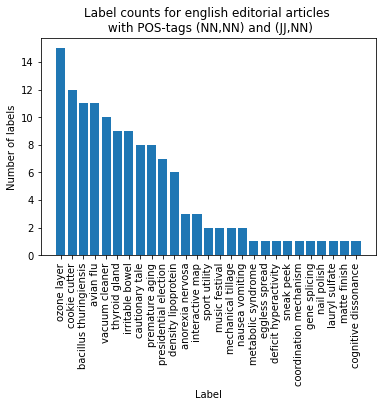

In [8]:
lc.plot_label_counts(df_pos, "label","mit_beiden_pos",lc.wordcount_scor, "english editorial articles \n with POS-tags (NN,NN) and (JJ,NN)",sort=True)

In [9]:
pos=[('NN','NN')]

In [10]:
labels_pos = tl.get_topic_lables(article_pos,article_texts,pos,vec,tm, n_cand_lables = 100,lable_min_df = 5, n_labels = 8)

shape topic model
(130, 6365)
pmishape
(6365, 100)


In [11]:
df_pos =hp.print_label_df(tm,labels_pos)
display(df_pos)

,0,1,2,3,4,5,6,7,8,9,label
Topic 0,say,safety,fda,recall,product,outbreak,company,people,california,illness,nausea vomiting
Topic 1,monsanto,industry,public,company,safety,call,court,group,u.s.,write,bacillus thuringiensis
Topic 2,store,say,grocery,new,will,market,customer,chain,more,year,cookie cutter
Topic 3,campaign,marketing,medium,site,this,hospital,web,video,article,â,bidding war
Topic 4,compost,waste,almond,scrap,facility,city,material,will,yard,like,vacuum cleaner
Topic 5,ddt,study,ban,allen,faculty,ph.d.,expose,studies,mouse,exposure,thyroid gland
Topic 6,restaurant,fast,chain,say,menu,ingredient,burger,chipotle,mcdonald,meal,music festival
Topic 7,grain,wheat,whole,flour,rice,myth,gluten,bread,white,brown,bowel syndrome
Topic 8,farmer,farm,program,policy,would,government,subsidy,who,president,obama,self sufficiency
Topic 9,chemical,exposure,health,toxic,safe,use,cancer,can,these,about,bacillus thuringiensis


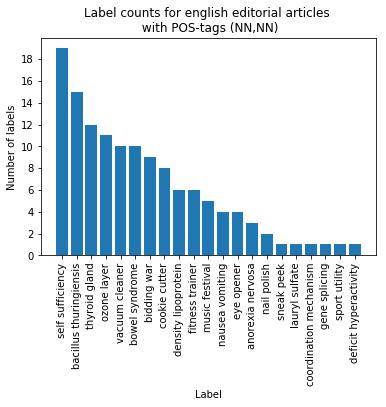

In [12]:
lc.plot_label_counts(df_pos, "label","mit_NN",lc.wordcount_scor, "english editorial articles \n with POS-tags (NN,NN)",sort=True, )

In [13]:
pos=[('JJ','NN')]

In [14]:
labels_pos = tl.get_topic_lables(article_pos,article_texts,pos,vec,tm, n_cand_lables = 100,lable_min_df = 5, n_labels = 8)
df_pos =hp.print_label_df(tm,labels_pos)
display(df_pos)

shape topic model
(130, 6365)
pmishape
(6365, 100)


,0,1,2,3,4,5,6,7,8,9,label
Topic 0,say,safety,fda,recall,product,outbreak,company,people,california,illness,cautionary tale
Topic 1,monsanto,industry,public,company,safety,call,court,group,u.s.,write,reasonable certainty
Topic 2,store,say,grocery,new,will,market,customer,chain,more,year,cautionary tale
Topic 3,campaign,marketing,medium,site,this,hospital,web,video,article,â,presidential election
Topic 4,compost,waste,almond,scrap,facility,city,material,will,yard,like,reasonable certainty
Topic 5,ddt,study,ban,allen,faculty,ph.d.,expose,studies,mouse,exposure,metabolic syndrome
Topic 6,restaurant,fast,chain,say,menu,ingredient,burger,chipotle,mcdonald,meal,hot fudge
Topic 7,grain,wheat,whole,flour,rice,myth,gluten,bread,white,brown,irritable bowel
Topic 8,farmer,farm,program,policy,would,government,subsidy,who,president,obama,presidential election
Topic 9,chemical,exposure,health,toxic,safe,use,cancer,can,these,about,premature aging


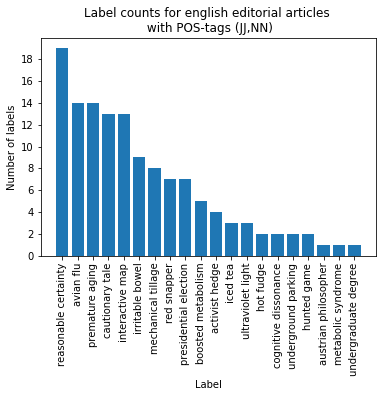

In [15]:
lc.plot_label_counts(df_pos, "label","mit_JJNN",lc.wordcount_scor, "english editorial articles \n with POS-tags (JJ,NN)",sort=True)

### All generated lables per topic

In [16]:
print("\nTopical labels:")
print("-" * 20)
for i, labels in enumerate(labels_pos):
    print(u"Topic {}: {}\n".format(
        i,
        ', '.join(map(lambda l: ' '.join(l), labels))
    ))


Topical labels:
--------------------
Topic 0: cautionary tale, reasonable certainty, irritable bowel, abdominal pain, red snapper, hot fudge, mechanical tillage, presidential election

Topic 1: reasonable certainty, mechanical tillage, avian flu, hot fudge, presidential election, cautionary tale, molecular biologist, interactive map

Topic 2: cautionary tale, avian flu, red snapper, activist hedge, underground parking, reasonable certainty, iced tea, interactive map

Topic 3: presidential election, reasonable certainty, avian flu, cautionary tale, keynote speaker, iced tea, mechanical tillage, hot fudge

Topic 4: reasonable certainty, cognitive dissonance, anaerobic digestion, irritable bowel, boosted metabolism, avian flu, activist hedge, premature aging

Topic 5: metabolic syndrome, reasonable certainty, premature aging, irritable bowel, mechanical tillage, hot fudge, boosted metabolism, presidential election

Topic 6: hot fudge, red snapper, iced tea, interactive map, cautionary ta

## Labels without POS-Tags

In [17]:
labels = tl.get_topic_lables([],article_texts,None,vec,tm, n_cand_lables = 100,lable_min_df = 5, n_labels = 8)
display(hp.print_label_df(tm,labels))

shape topic model
(130, 6365)
pmishape
(6365, 100)


,0,1,2,3,4,5,6,7,8,9,label
Topic 0,say,safety,fda,recall,product,outbreak,company,people,california,illness,earl butz
Topic 1,monsanto,industry,public,company,safety,call,court,group,u.s.,write,carey gillam
Topic 2,store,say,grocery,new,will,market,customer,chain,more,year,a.c. gallo
Topic 3,campaign,marketing,medium,site,this,hospital,web,video,article,â,frosted flakes
Topic 4,compost,waste,almond,scrap,facility,city,material,will,yard,like,bon appétit
Topic 5,ddt,study,ban,allen,faculty,ph.d.,expose,studies,mouse,exposure,kirsten brandt
Topic 6,restaurant,fast,chain,say,menu,ingredient,burger,chipotle,mcdonald,meal,dunkin donuts
Topic 7,grain,wheat,whole,flour,rice,myth,gluten,bread,white,brown,cara rosenbloom
Topic 8,farmer,farm,program,policy,would,government,subsidy,who,president,obama,rahm emanuel
Topic 9,chemical,exposure,health,toxic,safe,use,cancer,can,these,about,polyvinyl chloride


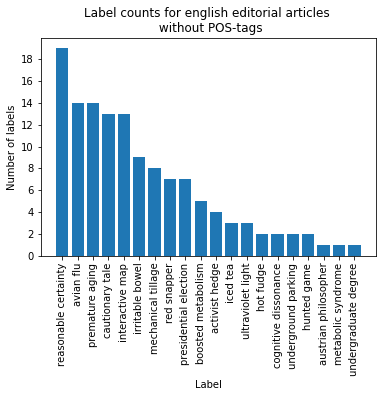

In [18]:
lc.plot_label_counts(df_pos, "label","ohne_POS",lc.wordcount_scor, "english editorial articles \n without POS-tags",sort=True)

## Labels for topics form Generation 1

In [19]:
article_data_bi = dl.get_articles_by_type("english", "editorial", merge_tokens=False, kind="with_2bigrams")
article_texts_bi = article_data_bi["article_texts"]

In [20]:
vec_bi = Vectorizer.load('vectorizer/ENED_lda_english_editorial.pkl')
tm_bi = TopicModel.load('topic_models/lda/ENED_lda_english_editorial_articles_130.pkl')

In [21]:
labels_bi = tl.get_topic_lables([],article_texts_bi,None,vec_bi,tm_bi,n_cand_lables = 100,lable_min_df = 5, n_labels = 5)

shape topic model
(130, 6254)
pmishape
(6254, 100)


In [22]:
display(hp.print_label_df(tm_bi,labels_bi))

,0,1,2,3,4,5,6,7,8,9,label
Topic 0,walmart,online,company,grocery,customer,delivery,store,service,business,retailer,wedbush securities
Topic 1,program,usda,agriculture,year,national,farmer,$,farm,rule,federal,mcevoy deputy_administrator
Topic 2,book,people,life,come,community,generation,movement,new,know,write,jose andres
Topic 3,yogurt,low,bacteria,carb,fermented,probiotic,fat,diet,eat,ancient,irritable_bowel syndrome
Topic 4,$,cup,q,soy,slice,serve,water,oz,foam,healthy,cara rosenbloom
Topic 5,outbreak,bacteria,safety,salmonella,e._coli,illness,produce,safe,contamination,people,irritable_bowel syndrome
Topic 6,cotton,clothing,make,use,grow,accord,powder,benefit,health,treat,eczema psoriasis
Topic 7,hen,soy,egg,operation,allow,disease,porch,large,barn,confine,irritable_bowel syndrome
Topic 8,labeling,label,gmo,law,consumer,genetically,state,ingredient,modify,company,sen._pat roberts_r
Topic 9,company,product,claim,campaign,honest,lawsuit,marketing,advertising,market,ad,stacy malkan


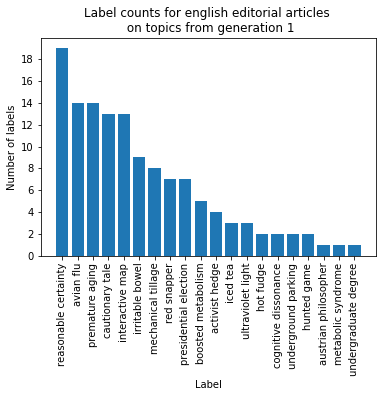

In [23]:
lc.plot_label_counts(df_pos, "label","alte_topics",lc.wordcount_scor,"english editorial articles \n on topics from generation 1", sort=True)